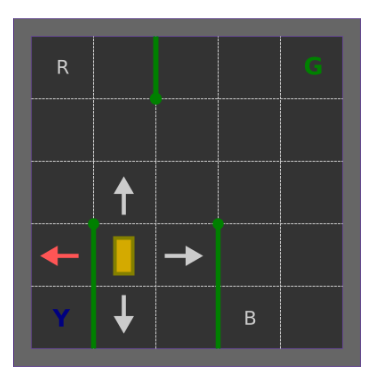

In [1]:
'''
A bunch of imports, you don't have to worry about these
'''
import random
import numpy as np
import random
import gym
from gym.wrappers.record_video import RecordVideo
import glob
import io
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [2]:
'''
The environment used here is extremely similar to the openai gym ones.
At first glance it might look slightly different. 
The usual commands we use for our experiments are added to this cell to aid you
work using this environment.
'''

#Setting up the environment
env = gym.make('Taxi-v3')

env.reset()

#Current State
print(env.s)

# 5x5x5x4 grid = 500 states
print ("Number of states:", env.env.nS)

# Primitive Actions
action = ["south", "north", "east", "west","pick","drop"]
#correspond to [0,1,2,3,4,5] that's actually passed to the environment

# either go left, up, down or right
print ("Number of actions that an agent can take:", env.env.nA)

# Example Transitions
rnd_action = random.randint(0, 3)
print ("Action taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
print ("Transition probability:", t_prob)
print ("Next state:", next_state)
print ("Reward recieved:", reward)
print ("Terminal state:", is_terminal)

state = env.reset()
print ("Decoded state:", list(env.decode(state)))
env.render()

354
Number of states: 500
Number of actions that an agent can take: 6
Action taken: north
Transition probability: {'prob': 1.0}
Next state: 254
Reward recieved: -1
Terminal state: False
Decoded state: [2, 2, 2, 0]
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
def stateData(state):
  picdrop = state%20
  pos = state//20
  y = pos//5
  x = pos%5
  drop = picdrop%4
  passenger = picdrop//4
  return x,y,drop,passenger

# Task 1
Complete the code cell below


In [4]:
#Update_Frequency Data structure? Check TODO 4

# TODO: epsilon-greedy action selection function
def egreedy_policy(q_values,state,epsilon):
  if q_values[state].any() and random.random() > epsilon:
    #print('greedy', np.argmax(q_values[state]),q_values.shape)
    return np.argmax(q_values[state])
  choice = random.randint(0,q_values.shape[-1]-1)  
  #print('random',choice,q_values.shape)  
  return choice

# Task 2
SMDP Q-Learning, Q-table and update frequency. 

In [5]:
from IPython.display import clear_output
import time

## Fully deterministic policy

In [6]:
policyOptionR = np.array([[1,3,0,0,0],
                 [1,3,0,0,0],
                 [1,3,3,3,3],
                 [1,1,1,1,1],
                 [1,1,1,1,1]
                 ])
policyOptionG = np.array([[0,0,2,2,1],
                 [0,0,2,2,1],
                 [2,2,2,1,1],
                 [1,2,1,1,1],
                 [1,2,1,1,1]
                 ])
policyOptionY = np.array([[0,3,0,0,0],
                          [0,3,0,0,0],
                          [0,3,3,3,3],
                          [0,1,1,1,3],
                          [0,1,3,1,3]
                          ])
policyOptionB = np.array([[0,0,0,0,3],
                          [0,0,0,0,3],
                          [2,2,2,0,3],
                          [1,1,1,0,3],
                          [1,1,1,0,3]
                          ])
policyOpt = [policyOptionR,policyOptionG,policyOptionY,policyOptionB]

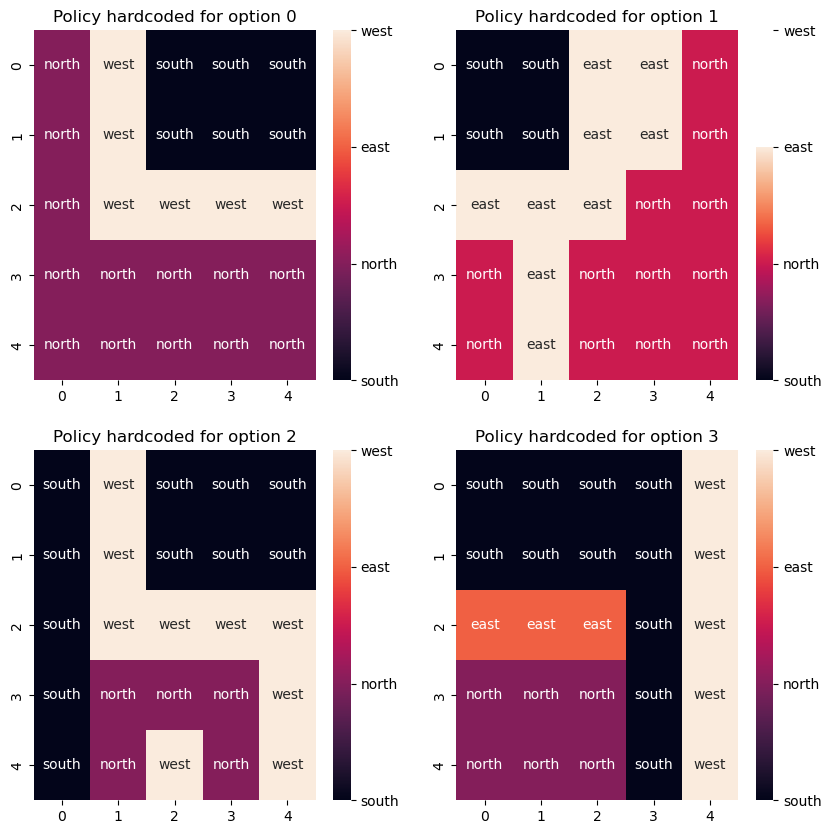

In [7]:
figure, axis = plt.subplots(2,2,figsize=(10,10))
for i in range(2):
  for j in range(2):
    labels = {0:'south',1:'north', 2:'east', 3:'west'}
    annot_text = np.vectorize(labels.get)((policyOpt[2*i+j]))
    ax = sns.heatmap((policyOpt[2*i+j]),ax=axis[i,j],annot = annot_text,fmt='')
    axis[i,j].set_title("Policy hardcoded for option {}".format(i*2+j)) 
    c_bar = ax.collections[0].colorbar
    c_bar.set_ticks([i for i in range(4)])
    c_bar.set_ticklabels(['south','north','east','west'])


In [8]:
#Fully deterministic
rewards0 = []
T = 1
goal = {0:[0,0],1:[0,4],2:[4,0],3:[4,3]}
Neps = 1500
for i in range(Neps):
  state = env.reset()
  done = False
  tot_rew = 0
  while not done:
    x,y,pas,drop = env.decode(state)
    
    #Go to passenger
    findPas = False
    while not findPas and not done:
      optact = policyOpt[pas][x,y]
      state, reward, done,_ = env.step(optact)
      tot_rew += reward
      x,y,pas,drop = env.decode(state)
      if x == goal[pas][0] and y==goal[pas][1]:
        findPas = True
      # clear_output(wait=True)
      # print(env.render()) 
      # time.sleep(T) 

    #Pickup passenger
    optact = 4
    state, reward, done,_ = env.step(optact)
    tot_rew += reward
    # clear_output(wait=True)
    # print(env.render())
    # time.sleep(T)

    #Go to drop location
    x,y,pas,drop = env.decode(state)
    findDrop = False
    while not findDrop and not done:
      optact = policyOpt[drop][x,y]
      state, reward, done,_ = env.step(optact)
      tot_rew += reward
      x,y,pas,drop = env.decode(state)
      if x == goal[drop][0] and y==goal[drop][1]:
        findDrop = True
      # clear_output(wait=True)
      # print(env.render())  
      # time.sleep(T)

    #Drop passenger
    optact = 5
    state, reward, done,_ = env.step(optact)
    tot_rew += reward   
    # clear_output(wait=True)
    env.render()
    # time.sleep(T)
  rewards0.append(tot_rew)   

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : 

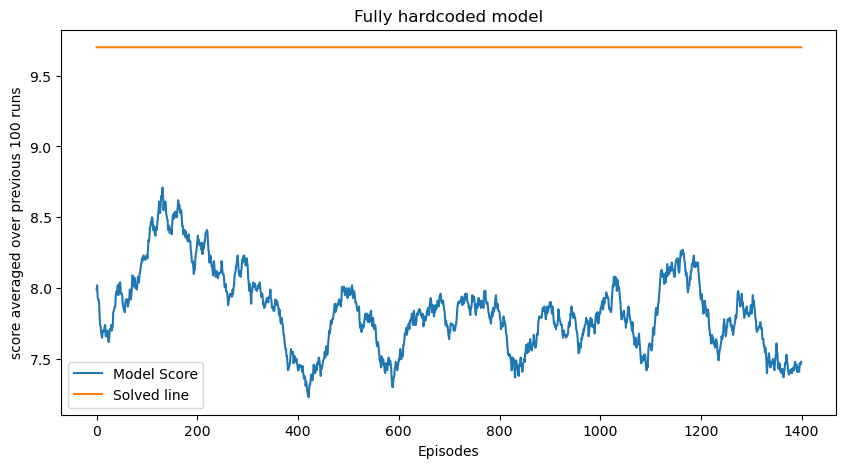

In [9]:
plt.figure(figsize = (10,5))
avg_rews0 = [np.average(rewards0[i:i+100]) for i in range(len(rewards0)-100)]
plt.plot(avg_rews0,label = 'Model Score')
plt.plot([9.7 for i in range(len(avg_rews0))],label = 'Solved line')
plt.xlabel('Episodes')
plt.ylabel('score averaged over previous 100 runs')
plt.title('Fully hardcoded model')
plt.legend()

## Deterministic policy over options with Q-learning Option policies

In [10]:
nO = 4 #number of options
goal = {0:[0,0],1:[0,4],2:[4,0],3:[4,3]}
def Option(env,state,Q,goalNum,eps=0.1,goal = goal):
  optdone = False
  x,y,pas,drop=env.decode(state)
  
  if (x==goal[goalNum][0] and y==goal[goalNum][1]):
      #print('Reached ',goalNum)
      optdone = True 
      if pas == goalNum:
        optact = 4
      elif drop == goalNum:
        optact = 5 
      else:   
        optact = 1 if (goalNum in [0,1]) else 0
  else:
    optact = egreedy_policy(Q[goalNum], 5*x+y, epsilon=eps) 
  return [optact,optdone]

'''
Now the new action space will contain
Primitive Actions: ["south", "north", "east", "west","pick","drop"]
Options: ["OptionR","OptionG","OptionY","OptionB"]
Total Actions :["south", "north", "east", "west","pick","drop","OptionR","OptionG","OptionY","OptionB"]
Corresponding to [0,1,2,3,4,5,6,7,8,9]
'''

'\nNow the new action space will contain\nPrimitive Actions: ["south", "north", "east", "west","pick","drop"]\nOptions: ["OptionR","OptionG","OptionY","OptionB"]\nTotal Actions :["south", "north", "east", "west","pick","drop","OptionR","OptionG","OptionY","OptionB"]\nCorresponding to [0,1,2,3,4,5,6,7,8,9]\n'

In [11]:
#deterministic option choice. Option policy from Q learning
rewards1 = []
T = 1
goal = {0:[0,0],1:[0,4],2:[4,0],3:[4,3]}


# Add parameters you might need here
gamma = 0.2
alpha = 0.1

Qopt = {i:np.zeros((env.nS//20,env.nA-2)) for i in range(nO)} #Q-values for each option
eps = {i:0.1 for i in range(nO)}
eps_min = 0.01
eps_decay = 0.99
count = 0
Neps = 1500
for i in range(Neps):
  state = env.reset()
  done = False
  tot_rew = 0
  while not done:
    x,y,pas,drop = env.decode(state)
    
    #Go to passenger and pickup
    findPas = False
    option = pas
    while not findPas and not done and (pas<4):

      optact,findPas = Option(env,state,Qopt,option,eps[option])
      [x,y,_,_]=  list(env.decode(state))  

      next_state, reward, done,_ = env.step(optact)
      [x1,y1,_,_]=  list(env.decode(next_state)) 

      tot_rew+=reward

      eps[option] = max(eps_min,eps_decay*eps[option])
      tot_rew+=reward
      reward_surr = reward
      if findPas:
        reward_surr = 20
      if optact<4:  
        Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])
      state = next_state

      # clear_output(wait=True)
      # print(env.render())
      # time.sleep(T)


    #Go to drop location and drop
    x,y,pas,drop = env.decode(state)
    findDrop = False
    option = drop
    while not findDrop and not done:
      # optact = policyOpt[drop][x,y]
      # state, reward, done,_ = env.step(optact)
      # tot_rew += reward
      # x,y,pas,drop = env.decode(state)
      # if x == goal[drop][0] and y==goal[drop][1]:
      #   findDrop = True
      optact,findDrop = Option(env,state,Qopt,option,eps[option])
      
      [x,y,_,_]=  list(env.decode(state))  

      next_state, reward, done,_ = env.step(optact)
      [x1,y1,_,_]=  list(env.decode(next_state)) 

      tot_rew+=reward

      eps[option] = max(eps_min,eps_decay*eps[option])
      tot_rew+=reward
      reward_surr = reward
      if findDrop:
        reward_surr = 20
      if optact<4:  
        Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])
      state = next_state

      # clear_output(wait=True)
      # print(env.render())  
      # time.sleep(T)

  x,y,pas,drop = env.decode(state)
  if pas==drop:
    count+=1
    clear_output(wait=True)
    print('Success ({}/{}) = {}%'.format(count,i+1,100*count/(i+1)))
    # clear_output(wait=True)
    # print(env.render())
    # time.sleep(T)
  rewards1.append(tot_rew)   

Success (1456/1500) = 97.06666666666666%


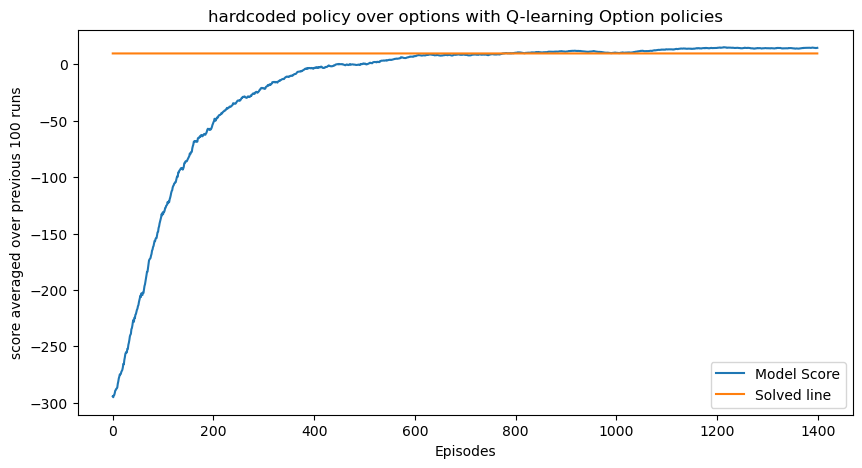

In [12]:
plt.figure(figsize = (10,5))
avg_rews1 = [np.average(rewards1[i:i+100]) for i in range(len(rewards1)-100)]
plt.plot(avg_rews1,label = 'Model Score')
plt.plot([9.7 for i in range(len(avg_rews1))],label = 'Solved line')
plt.xlabel('Episodes')
plt.ylabel('score averaged over previous 100 runs')
plt.title('hardcoded policy over options with Q-learning Option policies')
plt.legend()

In [13]:
state = env.reset()
done = False
tot_rew = 0
while not done:
  x,y,pas,drop = env.decode(state)
  
  #Go to passenger and pickup
  findPas = False
  option = pas
  while not findPas and not done and (pas<4):

    optact,findPas = Option(env,state,Qopt,option,eps[option])
    [x,y,_,_]=  list(env.decode(state))  

    next_state, reward, done,_ = env.step(optact)
    [x1,y1,_,_]=  list(env.decode(next_state)) 

    tot_rew+=reward

    eps[option] = max(eps_min,eps_decay*eps[option])
    tot_rew+=reward
    reward_surr = reward
    if findPas:
      reward_surr = 20
    if optact<4:  
      Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])
    state = next_state

    clear_output(wait=True)
    print(env.render())
    time.sleep(T)


  #Go to drop location and drop
  x,y,pas,drop = env.decode(state)
  findDrop = False
  option = drop
  while not findDrop and not done:
    optact,findDrop = Option(env,state,Qopt,option,eps[option])
    
    [x,y,_,_]=  list(env.decode(state))  

    next_state, reward, done,_ = env.step(optact)
    [x1,y1,_,_]=  list(env.decode(next_state)) 

    tot_rew+=reward

    eps[option] = max(eps_min,eps_decay*eps[option])
    tot_rew+=reward
    reward_surr = reward
    if findDrop:
      reward_surr = 20
    if optact<4:  
      Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])
    state = next_state

    clear_output(wait=True)
    print(env.render())  
    time.sleep(T)

x,y,pas,drop = env.decode(state)
if pas==drop:
  count+=1
  print('Success ({}/{}) in {}th episode'.format(count,Neps,i))
  # clear_output(wait=True)
  # print(env.render())
  # time.sleep(T)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
None
Success (1457/1500) in 1499th episode


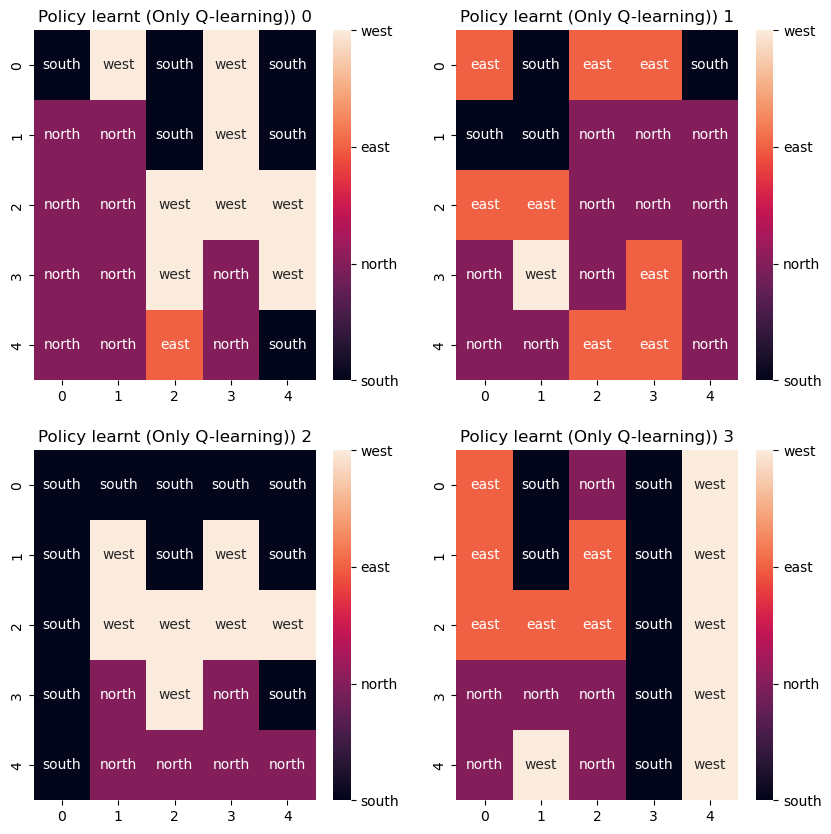

In [14]:
figure, axis = plt.subplots(2,2,figsize=(10,10))
for i in range(2):
  for j in range(2):
    labels = {0:'south',1:'north', 2:'east', 3:'west'}
    annot_text = np.vectorize(labels.get)(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5))
    ax = sns.heatmap(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5),ax=axis[i,j],annot = annot_text,fmt='')
    axis[i,j].set_title("Policy learnt (Only Q-learning)) {}".format(i*2+j))
    c_bar = ax.collections[0].colorbar
    c_bar.set_ticks([i for i in range(4)])
    c_bar.set_ticklabels(['south','north','east','west'])


## SMDP learning of policy of selection options, with option policy from Q learning

In [14]:
#### SMDP Q-Learning 

rewards2 = []
T = 1
goal = {0:[0,0],1:[0,4],2:[4,0],3:[4,3]}





# Add parameters you might need here
gamma = 0.9
alpha = 0.1

#Q-Table: (States x Actions) === (env.ns(48) x total actions(6))
nX = 5; nY = 5; nPas = 5; nDrop = 4
q_values_SMDP = np.zeros((nPas*nDrop,nO))
updates_SMDP = np.zeros((nPas*nDrop,nO))

Qopt = {i:np.zeros((env.nS//20,env.nA-2)) for i in range(nO)} #Q-values for each option
eps = {i:0.01 for i in range(nO)}
eps_min = 0.01
eps_decay = 0.99
eps_main = 0.5
count = 0
Neps = 1500

# Iterate over Neps episodes
for i in range(Neps):
    state = env.reset()    
    done = False
    tot_rew = 0
    # While episode is not over
    while not done:
        
        # Choose action       
        x,y,pas,drop = env.decode(state) 
        subState = nDrop*pas+drop
        option = egreedy_policy(q_values_SMDP, subState, epsilon=eps_main)
        eps_main = max(eps_min,eps_decay*eps_main)
        reward_bar = 0
        optdone = False
        move = 0
        prev = state  

        #Go to location and drop/pick
        x,y,pas,drop = env.decode(state)
        optdone = False
        while not optdone and not done:
          # optact = policyOpt[drop][x,y]
          # state, reward, done,_ = env.step(optact)
          # tot_rew += reward
          # x,y,pas,drop = env.decode(state)
          # if x == goal[drop][0] and y==goal[drop][1]:
          #   findDrop = True
          optact,optdone = Option(env,state,Qopt,option,eps[option])
          
          [x,y,_,_]=  list(env.decode(state))  

          next_state, reward, done,_ = env.step(optact)
          [x1,y1,_,_]=  list(env.decode(next_state)) 
          reward_bar = gamma*reward_bar + reward
          move += 1
          tot_rew+=reward

          eps[option] = max(eps_min,eps_decay*eps[option])
          tot_rew+=reward
          reward_surr = reward
          if optdone:
            reward_surr = 20
          if optact<4:  
            Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])
          state = next_state

          

            #--
        _,_,pas,drop = env.decode(state) 
        subState = nDrop*pas+drop

        _,_,pas,drop = env.decode(prev) 
        subPrev = nDrop*pas+drop

        q_values_SMDP[subPrev, option] += alpha*(reward_bar + (gamma**move)*np.max(q_values_SMDP[subState, :]) - q_values_SMDP[subPrev, option])
        updates_SMDP[subPrev, option] += 1
    rewards2.append(tot_rew)
    x,y,pas,drop = env.decode(state)
    if pas==drop:
      count+=1
      clear_output(wait=True)
      print('Success ({}/{}) = {}%'.format(count,i+1,100*count/(i+1)))
 
        

Success (1482/1500) = 98.8%


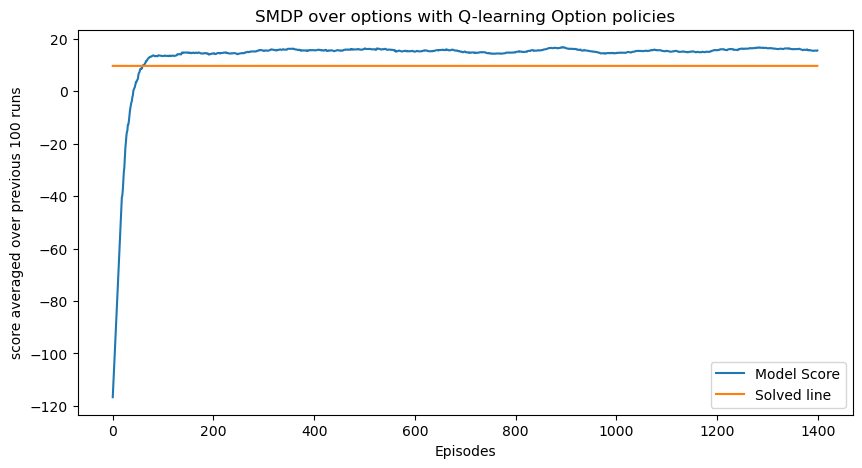

In [15]:
plt.figure(figsize = (10,5))
avg_rews2 = [np.average(rewards2[i:i+100]) for i in range(len(rewards2)-100)]
plt.plot(avg_rews2,label = 'Model Score')
plt.plot([9.7 for i in range(len(avg_rews2))],label = 'Solved line')
plt.xlabel('Episodes')
plt.ylabel('score averaged over previous 100 runs')
plt.title('SMDP over options with Q-learning Option policies')
plt.legend()

In [16]:
state = env.reset()    
done = False
tot_rew = 0
T = 1
# While episode is not over
while not done:
    
    # Choose action        
    x,y,pas,drop = env.decode(state) 
    subState = nDrop*pas+drop
    option = egreedy_policy(q_values_SMDP, subState, epsilon=eps_main)
    eps_main = max(eps_min,eps_decay*eps_main)
    reward_bar = 0
    optdone = False
    move = 0
    prev = state  
    while (optdone == False) and not done:
        

        #--
        #Go to location and drop/pick
        x,y,pas,drop = env.decode(state)
        optdone = False
        while not optdone and not done:
          # optact = policyOpt[drop][x,y]
          # state, reward, done,_ = env.step(optact)
          # tot_rew += reward
          # x,y,pas,drop = env.decode(state)
          # if x == goal[drop][0] and y==goal[drop][1]:
          #   findDrop = True
          optact,optdone = Option(env,state,Qopt,option,eps[option])
          
          [x,y,_,_]=  list(env.decode(state))  

          next_state, reward, done,_ = env.step(optact)

          clear_output(wait=True)
          print(env.render())  
          time.sleep(T)
          
          [x1,y1,_,_]=  list(env.decode(next_state)) 

          tot_rew+=reward

          eps[option] = max(eps_min,eps_decay*eps[option])
          tot_rew+=reward
          reward_surr = reward
          if optdone:
            reward_surr = 20
          if optact<4:  
            Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])
          state = next_state

        #--

    _,_,pas,drop = env.decode(state) 
    subState = nDrop*pas+drop

    _,_,pas,drop = env.decode(prev) 
    subPrev = nDrop*pas+drop
    
    q_values_SMDP[subPrev, option] += alpha*(reward_bar + (gamma**move)*np.max(q_values_SMDP[subState, :]) - q_values_SMDP[subPrev, option])
    updates_SMDP[subPrev, option] += 1
x,y,pas,drop = env.decode(state)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
None


Text(0.5, 1.0, 'Policy learnt by SMDP')

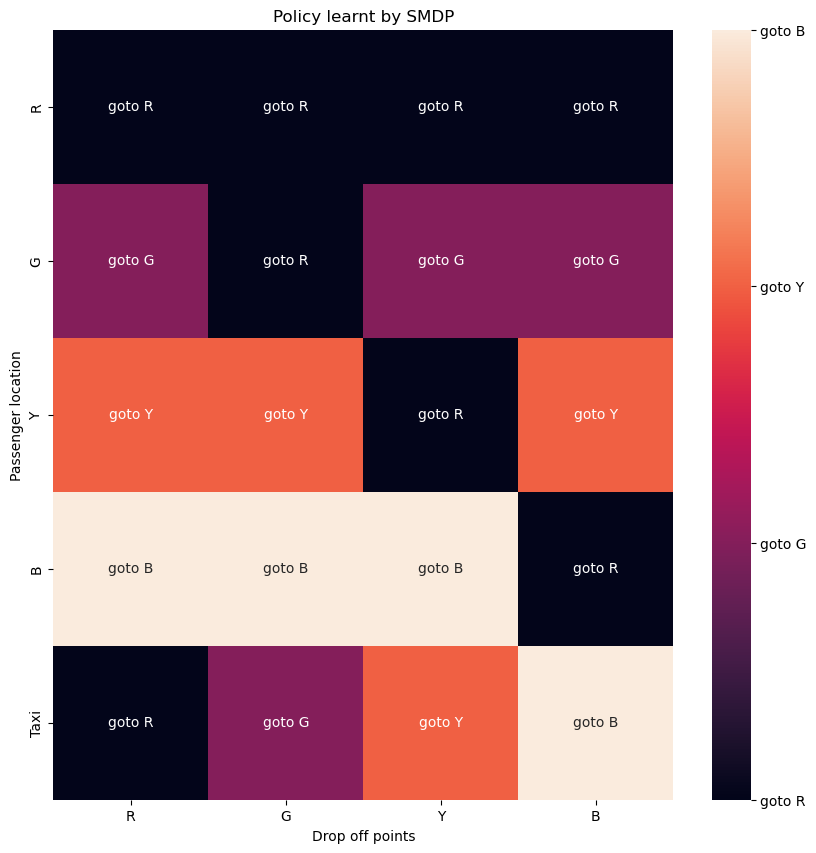

In [18]:
Qmax_SMDP = np.argmax(q_values_SMDP,axis = 1).reshape(5,4)
labels = {0:'goto R',1:'goto G', 2:'goto Y', 3:'goto B'}
annot_text = np.vectorize(labels.get)(Qmax_SMDP)
figure, axis = plt.subplots(1, 1,figsize=(10,10))
ax = sns.heatmap(Qmax_SMDP,ax=axis,xticklabels = ["R","G","Y","B"],yticklabels = ['R','G','Y','B','Taxi'],annot = annot_text,fmt = '')
c_bar = ax.collections[0].colorbar
c_bar.set_ticks([0, 1, 2, 3])
c_bar.set_ticklabels(['goto R','goto G', 'goto Y', 'goto B'])

axis.set_xlabel('Drop off points')
axis.set_ylabel("Passenger location")
axis.set_title('Policy learnt by SMDP')

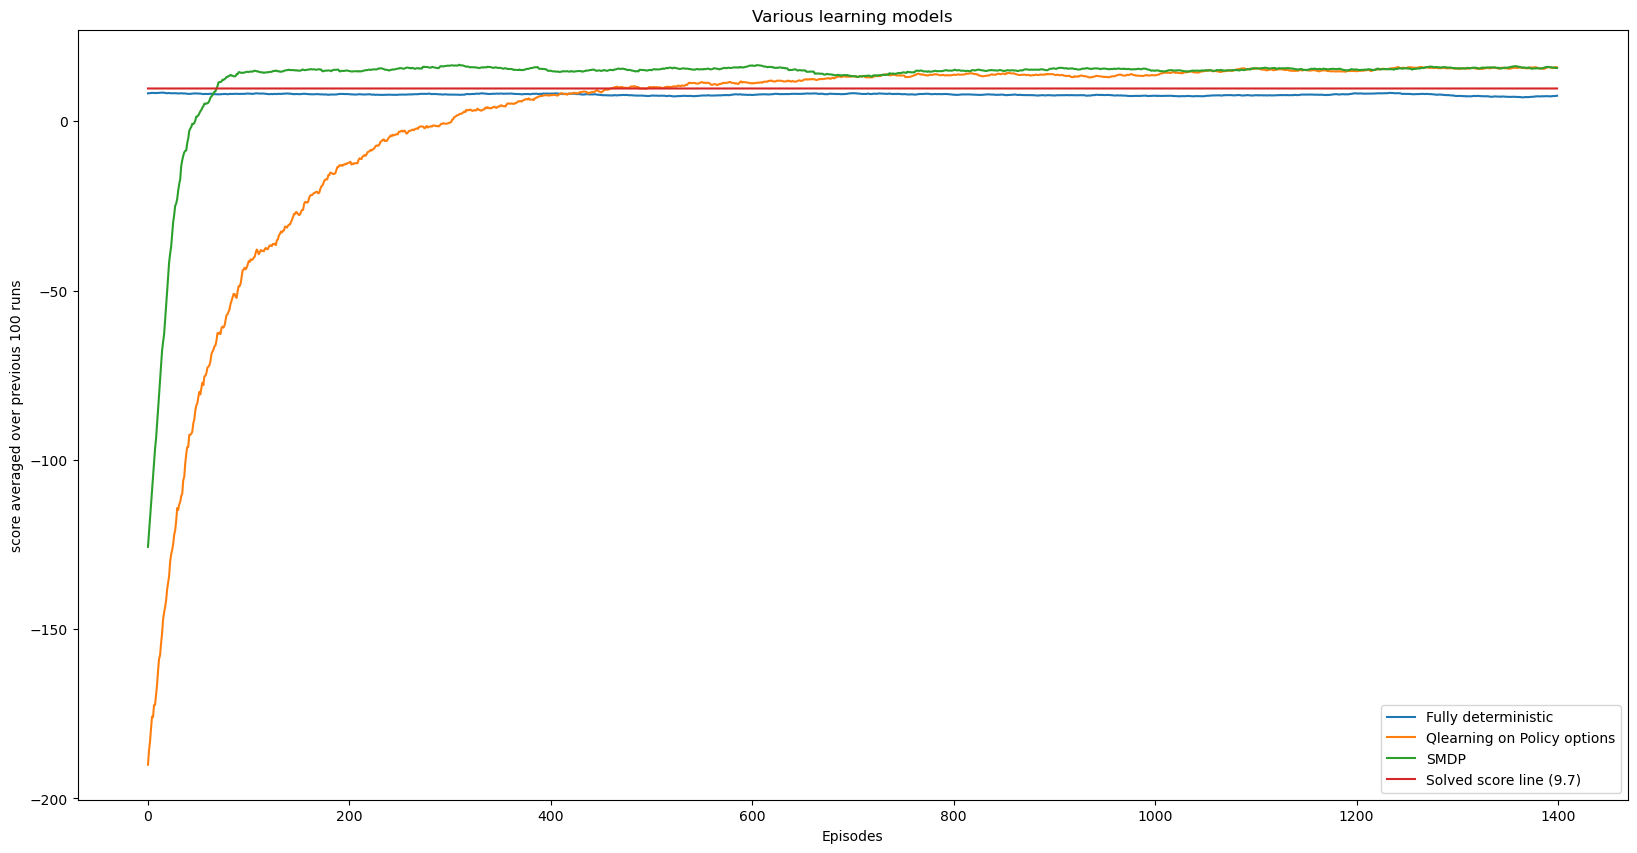

In [19]:
plt.figure(figsize = (20,10))
plt.plot(avg_rews0,label = 'Fully deterministic')
plt.plot(avg_rews1,label = 'Qlearning on Policy options')
plt.plot(avg_rews2,label = 'SMDP')
plt.plot([9.7 for i in range(len(avg_rews2))],label = 'Solved score line (9.7)')
plt.xlabel('Episodes')
plt.ylabel('score averaged over previous 100 runs')
plt.title('Various learning models')
plt.legend()

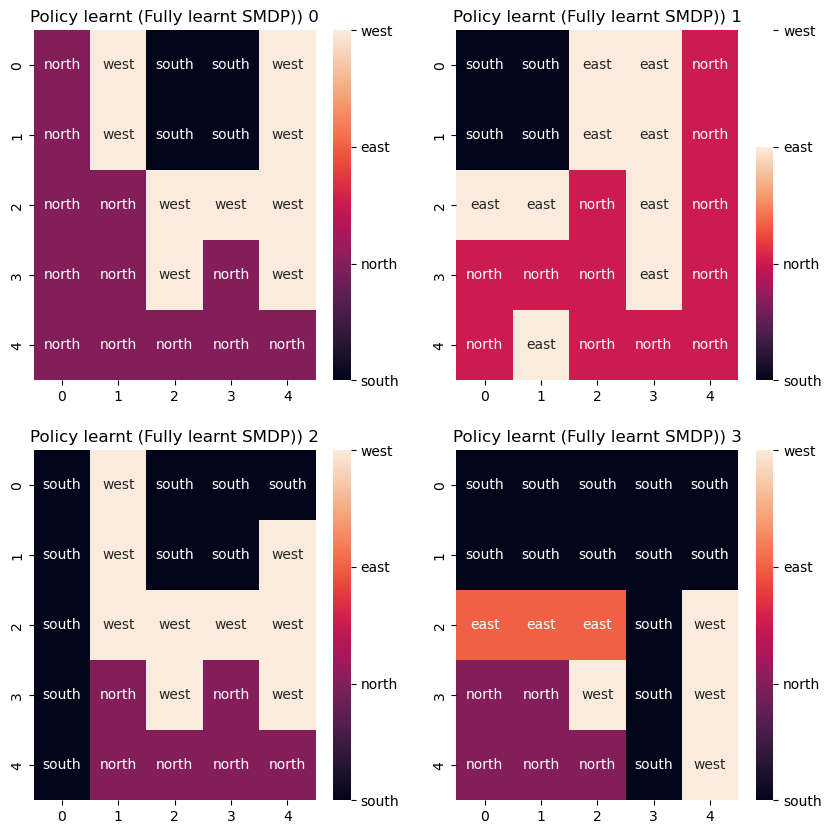

In [20]:
figure, axis = plt.subplots(2,2,figsize=(10,10))
for i in range(2):
  for j in range(2):
    labels = {0:'south',1:'north', 2:'east', 3:'west'}
    annot_text = np.vectorize(labels.get)(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5))
    ax = sns.heatmap(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5),ax=axis[i,j],annot = annot_text,fmt='')
    axis[i,j].set_title("Policy learnt (Fully learnt SMDP)) {}".format(i*2+j))
    c_bar = ax.collections[0].colorbar
    c_bar.set_ticks([i for i in range(4)])
    c_bar.set_ticklabels(['south','north','east','west'])
   

# IOQL

In [17]:
def Sub(state, nPas = nPas, nDrop = nDrop):
  _,_,pas,drop = env.decode(state) 
  subState = nDrop*pas+drop 
  return subState 

In [18]:
#### Intra Option Q-Learning

rewards3 = []
T = 1
goal = {0:[0,0],1:[0,4],2:[4,0],3:[4,3]}



# Add parameters you might need here
gamma = 0.9
alpha = 0.1

#Q-Table: (States x Actions) === (env.ns(48) x total actions(6))
nX = 5; nY = 5; nPas = 5; nDrop = 4
q_values_IOQL = np.zeros((nPas*nDrop,nO))
updates_IOQL = np.zeros((nPas*nDrop,nO))

Qopt = {i:np.zeros((env.nS//20,env.nA-2)) for i in range(nO)} #Q-values for each option


eps = {i:0.01 for i in range(nO)}
eps_min = 0.01
eps_decay = 0.99
eps_main = 0.5

count = 0
Neps = 1500

# Iterate over Neps episodes
for i in range(Neps):
    state = env.reset()    
    done = False
    tot_rew=0

    # While episode is not over
    while not done:
        
        # Choose action  
        _,_,pas,drop = env.decode(state) 
        subState = nDrop*pas+drop      
        action = egreedy_policy(q_values_IOQL, subState, epsilon=eps_main)
        eps_main = max(eps_min,eps_main*eps_decay)
        

        option = action
        optdone = False
        prev = state  
        while not optdone and not done:
            
            # Think about what this function might do?
            optact,optdone = Option(env,state,Qopt,option,eps[option])
            next_state, reward, done,_ = env.step(optact)
            
            tot_rew+=reward

            
            #Option Policy Learning
            [x,y,_,_]=  list(env.decode(state)) 
            [x1,y1,_,_]=  list(env.decode(next_state)) 

            

            eps[option] = max(eps_min,eps_decay*eps[option])
            tot_rew+=reward
            reward_surr = reward
            if optdone:
              reward_surr = 20
            if optact<4:  
              Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])



            #finding all options giving same action call
            
            for o in range(nO):
              optact_o,optdone_o = Option(env,state,Qopt,o,eps[o])
              if optact_o == optact:
                eps[o] = max(eps_min,eps_decay*eps[o])
                if optdone_o:
                  q_values_IOQL[Sub(state), o] += alpha*(reward + gamma*np.max(q_values_IOQL[Sub(next_state), :]) - q_values_IOQL[Sub(state), o])
                else:
                  q_values_IOQL[Sub(state), o] += alpha*(reward + gamma*q_values_IOQL[Sub(next_state), o] - q_values_IOQL[Sub(state), o]) 

                updates_IOQL[Sub(state), o] += 1
            state = next_state 
        
    rewards3.append(tot_rew)
    x,y,pas,drop = env.decode(state)
    if pas==drop:
      count+=1
      clear_output(wait=True)
      print('Success ({}/{}) = {}%'.format(count,i+1,100*count/(i+1)))
 
        

Success (1476/1500) = 98.4%


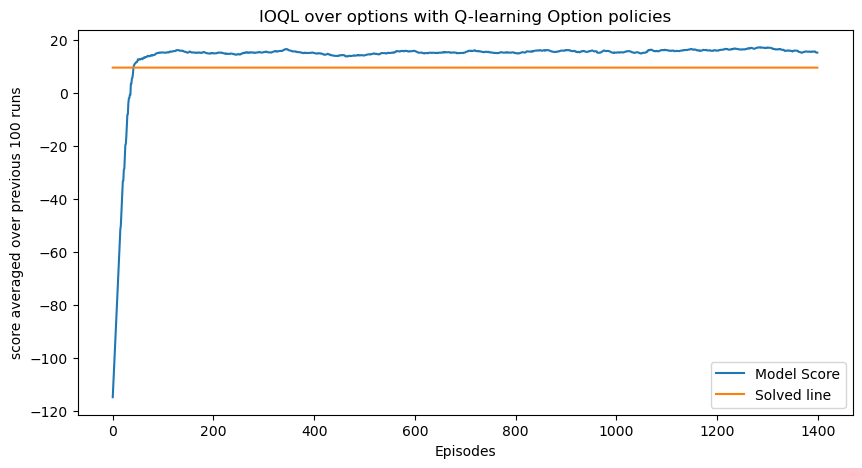

In [19]:
plt.figure(figsize = (10,5))
avg_rews3 = [np.average(rewards3[i:i+100]) for i in range(len(rewards3)-100)]
plt.plot(avg_rews3,label = 'Model Score')
plt.plot([9.7 for i in range(len(avg_rews3))],label = 'Solved line')
plt.xlabel('Episodes')
plt.ylabel('score averaged over previous 100 runs')
plt.title('IOQL over options with Q-learning Option policies')
plt.legend()

In [20]:
state = env.reset()    
done = False
tot_rew=0

# While episode is not over
while not done:
    
    # Choose action  
    _,_,pas,drop = env.decode(state) 
    subState = nDrop*pas+drop      
    action = egreedy_policy(q_values_IOQL, subState, epsilon=eps_main)
    eps_main = max(eps_min,eps_main*eps_decay)
    

    option = action
    optdone = False
    prev = state  
    while not optdone and not done:
        
        # Think about what this function might do?
        optact,optdone = Option(env,state,Qopt,option,eps[option])
        next_state, reward, done,_ = env.step(optact)
        clear_output(wait=True)
        print(env.render())  
        time.sleep(T)
        
        tot_rew+=reward

        
        #Option Policy Learning
        [x,y,_,_]=  list(env.decode(state)) 
        [x1,y1,_,_]=  list(env.decode(next_state)) 

        

        eps[option] = max(eps_min,eps_decay*eps[option])
        tot_rew+=reward
        reward_surr = reward
        if optdone:
          reward_surr = 20
        if optact<4:  
          Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])


        _ ,optdone_next = Option(env,state,Qopt,option,eps[option]) 

        #finding all options giving same action call
        
        for o in range(nO):
          optact_o,optdone_o = Option(env,state,Qopt,o,eps[o])
          if optact_o == optact:
            eps[o] = max(eps_min,eps_decay*eps[o])
            if optdone_o:
              q_values_IOQL[Sub(state), o] += alpha*(reward + gamma*np.max(q_values_IOQL[Sub(next_state), :]) - q_values_IOQL[Sub(state), o])
            else:
              q_values_IOQL[Sub(state), o] += alpha*(reward + gamma*q_values_IOQL[Sub(next_state), o] - q_values_IOQL[Sub(state), o]) 

            updates_IOQL[Sub(state), o] += 1
        state = next_state 
    
rewards3.append(tot_rew)
x,y,pas,drop = env.decode(state)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
None


Text(0.5, 1.0, 'Policy over options learnt by Intra Options')

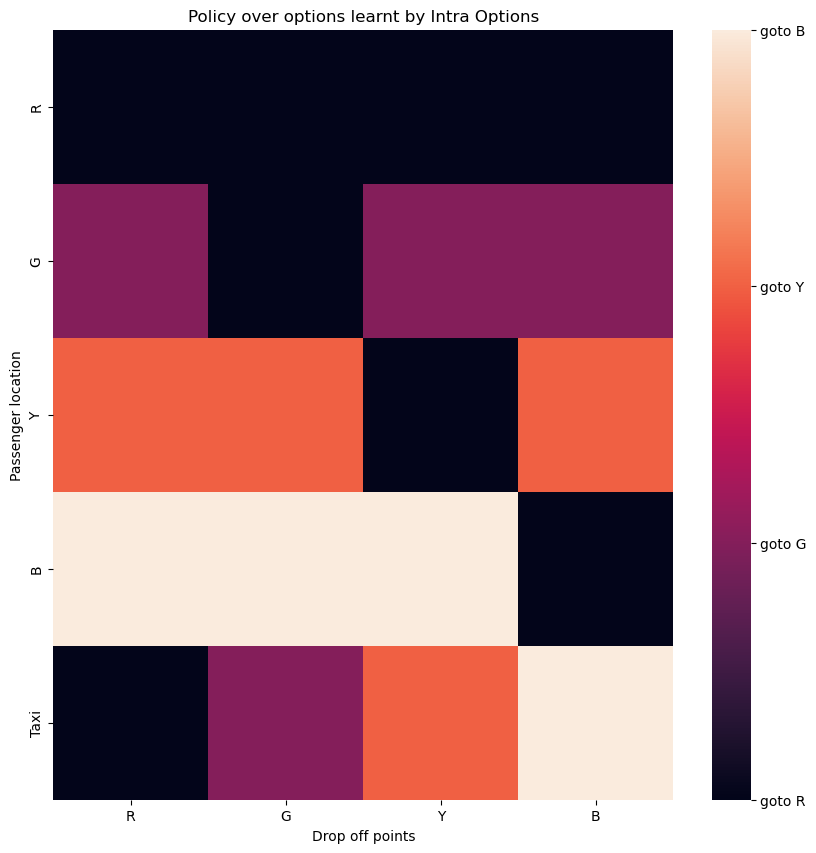

In [25]:
Qmax_IOQL = np.argmax(q_values_IOQL[:,-4:],axis = 1).reshape(5,4)
labels = {0:'goto R',1:'goto G', 2:'goto Y', 3:'goto B'}
figure, axis = plt.subplots(1, 1,figsize=(10,10))
ax = sns.heatmap(Qmax_IOQL,ax=axis,xticklabels = ["R","G","Y","B"],yticklabels = ['R','G','Y','B','Taxi'])
c_bar = ax.collections[0].colorbar
c_bar.set_ticks([0, 1, 2, 3])
#c_bar.set_ticklabels(['south','north','east','west','pick up','drop','goto R','goto G', 'goto Y', 'goto B'])
c_bar.set_ticklabels(['goto R','goto G', 'goto Y', 'goto B'])
axis.set_xlabel('Drop off points')
axis.set_ylabel("Passenger location")
axis.set_title('Policy over options learnt by Intra Options')

Text(0.5, 1.0, 'Policy over default actions learnt by Intra Options')

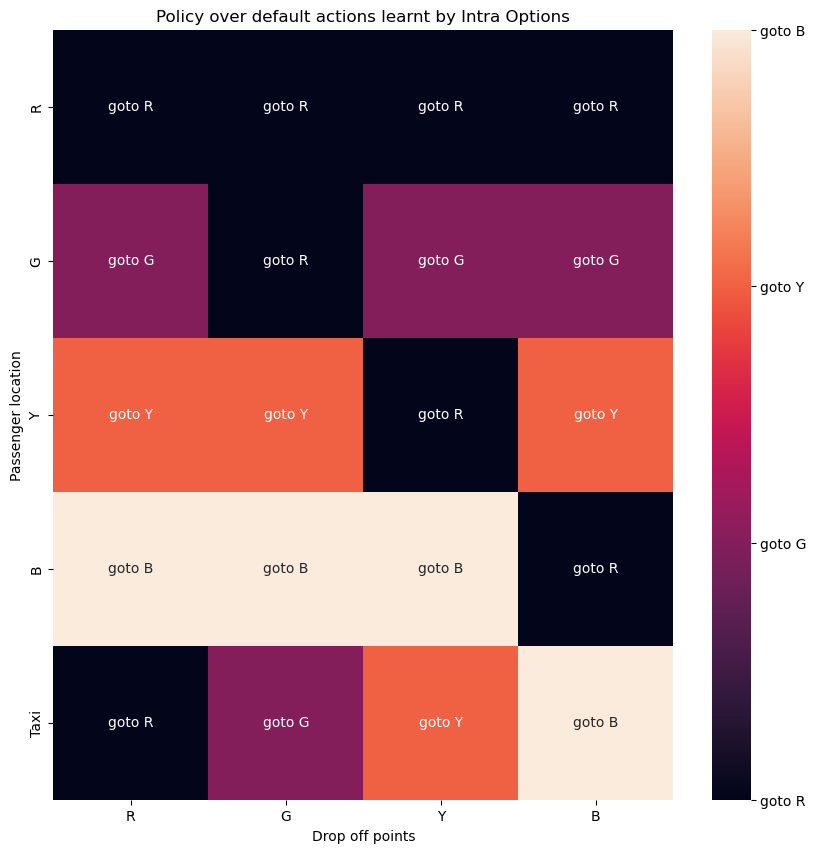

In [26]:
Qmax_IOQL = np.argmax(q_values_IOQL,axis = 1).reshape(5,4)
labels = {0:'goto R',1:'goto G', 2:'goto Y', 3:'goto B'}
annot_text = np.vectorize(labels.get)(Qmax_IOQL)

figure, axis = plt.subplots(1, 1,figsize=(10,10))
ax = sns.heatmap(Qmax_IOQL,ax=axis,xticklabels = ["R","G","Y","B"],yticklabels = ['R','G','Y','B','Taxi'],annot = annot_text, fmt = '')
c_bar = ax.collections[0].colorbar
c_bar.set_ticks([0, 1, 2, 3])

c_bar.set_ticklabels(['goto R','goto G', 'goto Y', 'goto B'])
#c_bar.set_ticklabels(['south','north','east','west','pick up','drop'])
axis.set_xlabel('Drop off points')
axis.set_ylabel("Passenger location")
axis.set_title('Policy over default actions learnt by Intra Options')

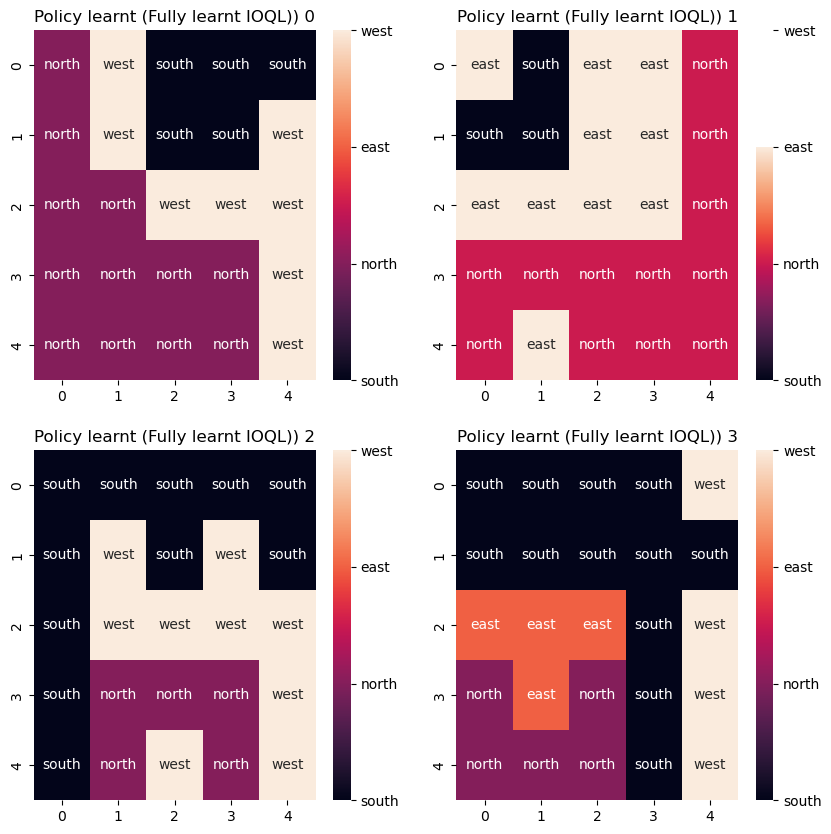

In [27]:
figure, axis = plt.subplots(2,2,figsize=(10,10))
for i in range(2):
  for j in range(2):
    labels = {0:'south',1:'north', 2:'east', 3:'west'}
    annot_text = np.vectorize(labels.get)(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5))
    ax = sns.heatmap(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5),ax=axis[i,j],annot = annot_text,fmt='')
    axis[i,j].set_title("Policy learnt (Fully learnt IOQL)) {}".format(i*2+j))
    c_bar = ax.collections[0].colorbar
    c_bar.set_ticks([i for i in range(4)])
    c_bar.set_ticklabels(['south','north','east','west'])
   

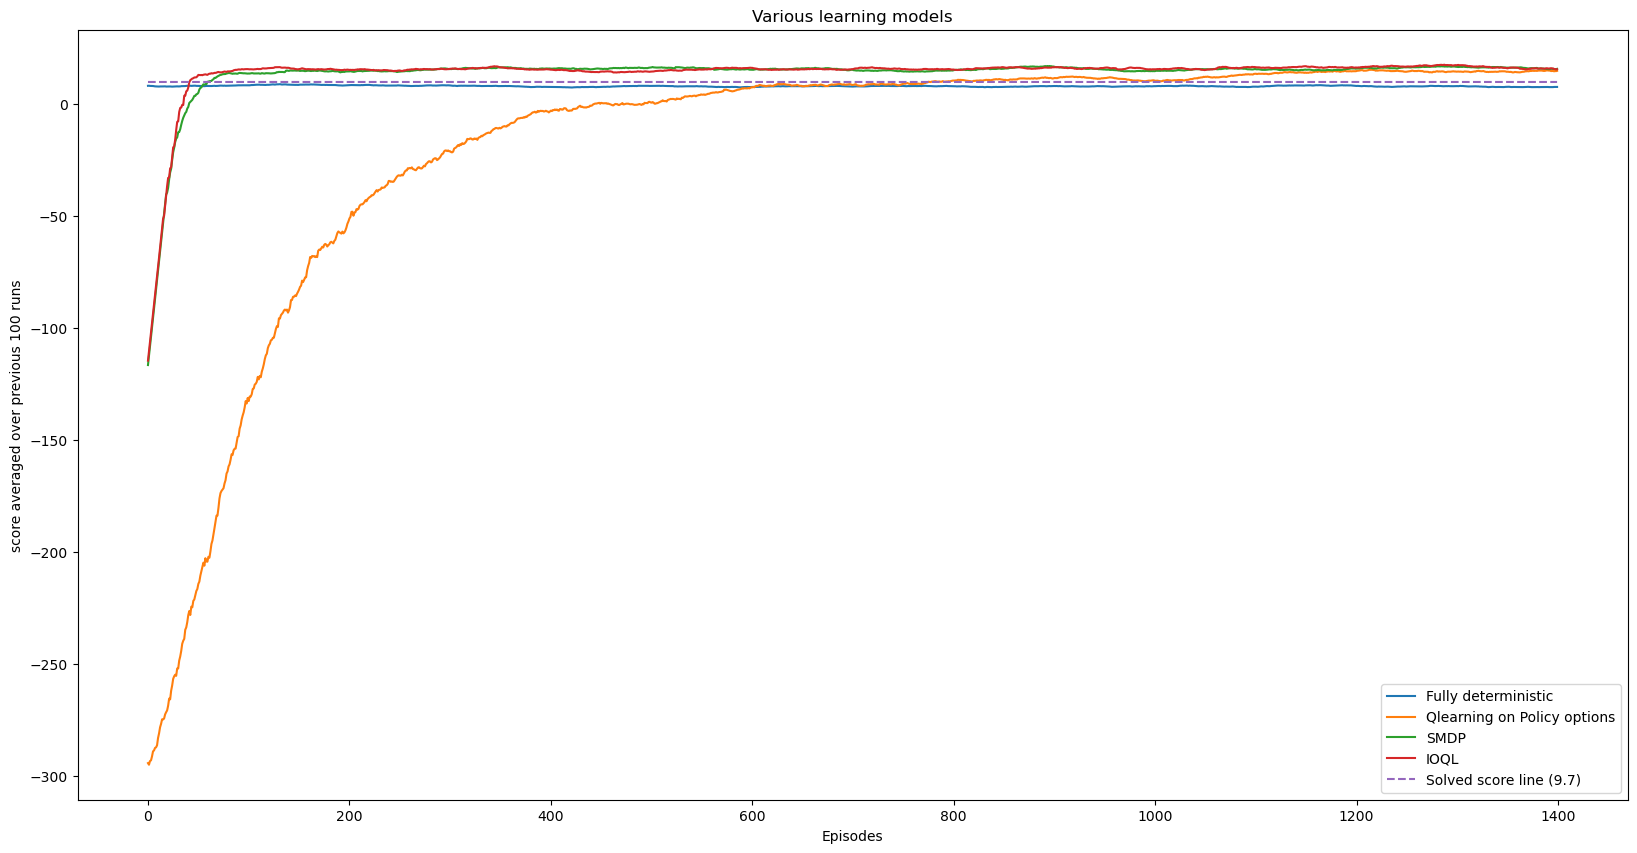

In [21]:
plt.figure(figsize = (20,10))
plt.plot(avg_rews0,label = 'Fully deterministic')
plt.plot(avg_rews1,label = 'Qlearning on Policy options')
plt.plot(avg_rews2,label = 'SMDP')
plt.plot(avg_rews3,label = 'IOQL')
plt.plot([9.7 for i in range(len(avg_rews2))],'--',label = 'Solved score line (9.7)')
plt.xlabel('Episodes')
plt.ylabel('score averaged over previous 100 runs')
plt.title('Various learning models')
plt.legend()

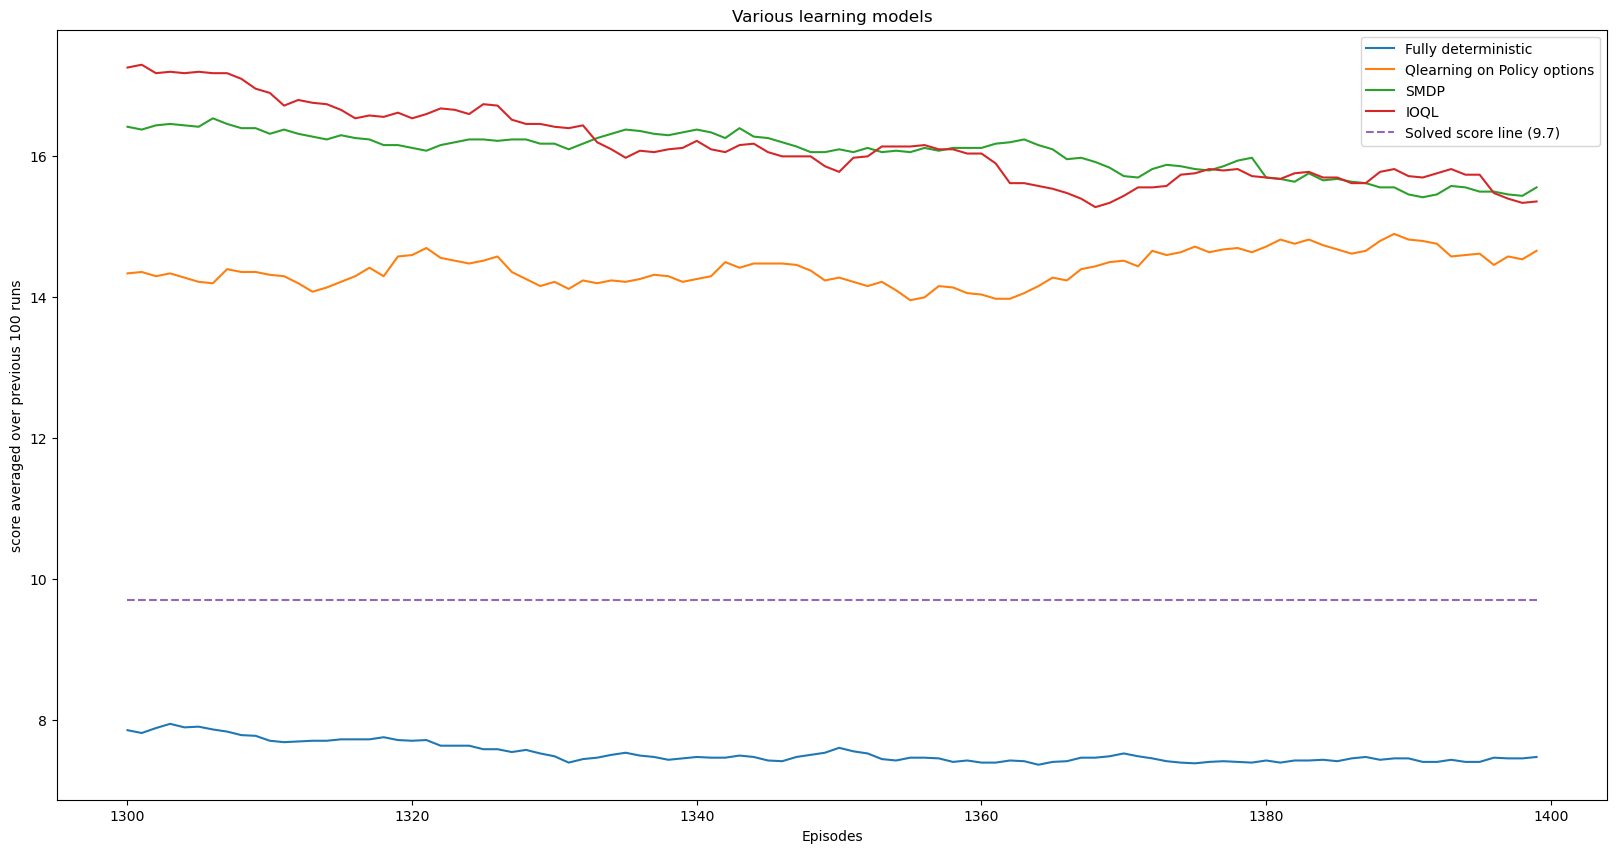

In [22]:
plt.figure(figsize = (20,10))
X = [i for i in range(len(avg_rews0)-100,len(avg_rews0))]
plt.plot(X,avg_rews0[-100:],label = 'Fully deterministic')
plt.plot(X,avg_rews1[-100:],label = 'Qlearning on Policy options')
plt.plot(X,avg_rews2[-100:],label = 'SMDP')
plt.plot(X,avg_rews3[-100:],label = 'IOQL')
plt.plot(X,[9.7 for i in range(100)],'--',label = 'Solved score line (9.7)')
plt.xlabel('Episodes')
plt.ylabel('score averaged over previous 100 runs')
plt.title('Various learning models')
plt.legend()

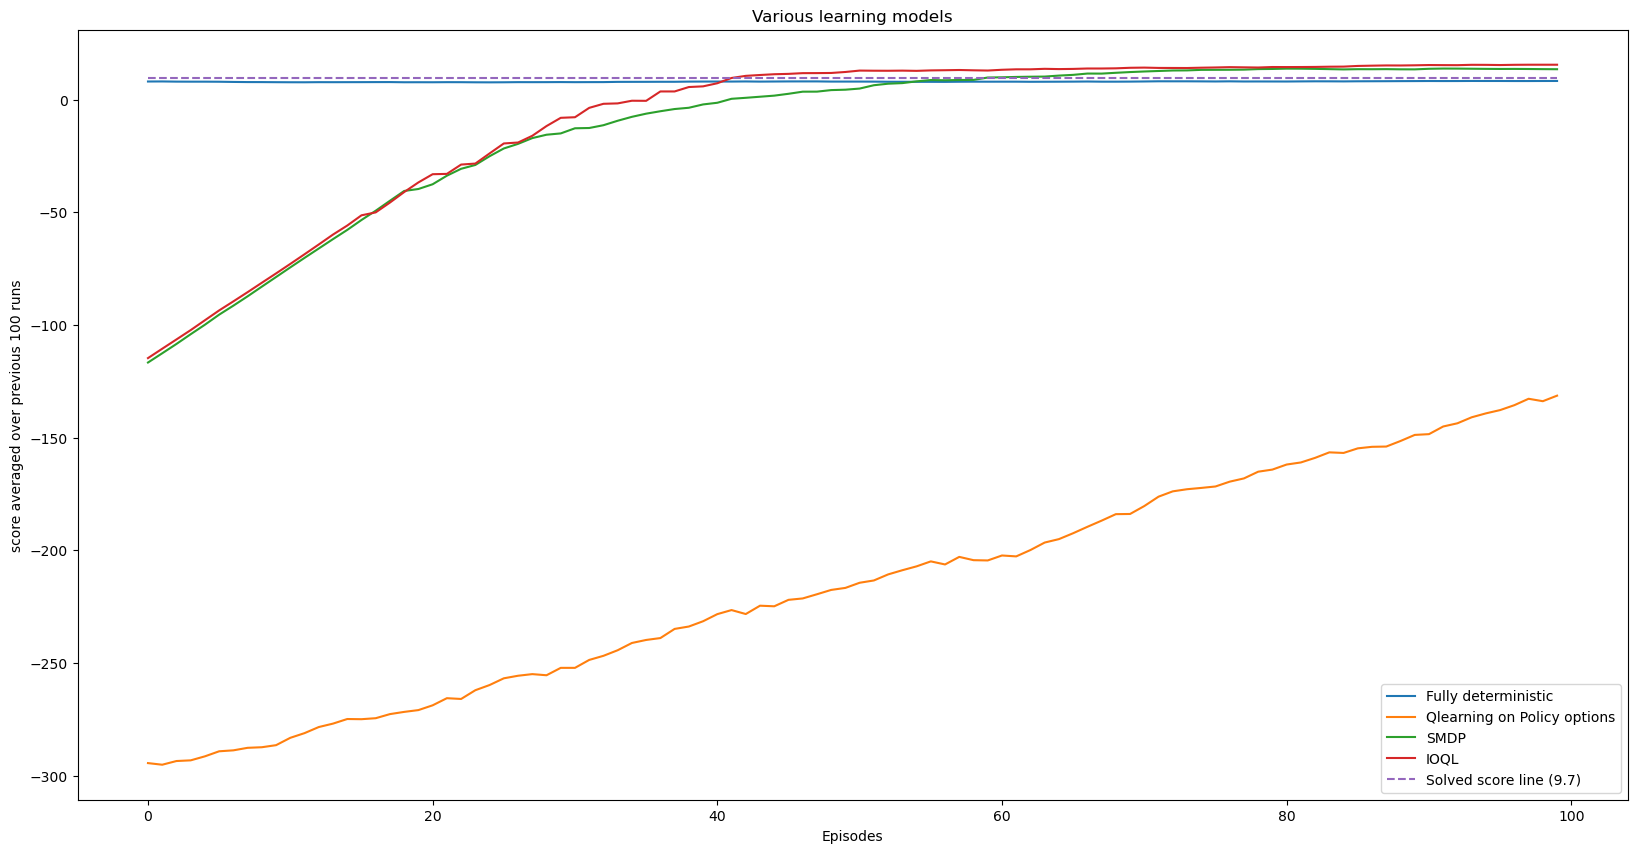

In [23]:
plt.figure(figsize = (20,10))
X = [i for i in range(100)]
plt.plot(X,avg_rews0[:100],label = 'Fully deterministic')
plt.plot(X,avg_rews1[:100],label = 'Qlearning on Policy options')
plt.plot(X,avg_rews2[:100],label = 'SMDP')
plt.plot(X,avg_rews3[:100],label = 'IOQL')
plt.plot(X,[9.7 for i in range(100)],'--',label = 'Solved score line (9.7)')
plt.xlabel('Episodes')
plt.ylabel('score averaged over previous 100 runs')
plt.title('Various learning models')
plt.legend()

# IOQL without state compression

In [25]:
#### Intra Option Q-Learning

rewards4 = []
T = 1
goal = {0:[0,0],1:[0,4],2:[4,0],3:[4,3]}



# Add parameters you might need here
gamma = 0.9
alpha = 0.1

#Q-Table: (States x Actions) === (env.ns(48) x total actions(6))
nX = 5; nY = 5; nPas = 5; nDrop = 4
q_values_IOQL = np.zeros((env.nS,nO))
updates_IOQL = np.zeros((env.nS,nO))

Qopt = {i:np.zeros((env.nS//20,env.nA-2)) for i in range(nO)} #Q-values for each option


eps = {i:0.01 for i in range(nO)}
eps_min = 0.01
eps_decay = 0.99
eps_main = 0.5

count = 0
Neps = 1500

# Iterate over Neps episodes
for i in range(Neps):
    state = env.reset()    
    done = False
    tot_rew=0

    # While episode is not over
    while not done:
        
        # Choose action  
   
        action = egreedy_policy(q_values_IOQL, state, epsilon=eps_main)
        eps_main = max(eps_min,eps_main*eps_decay)
        

        option = action
        optdone = False
        prev = state  
        while not optdone and not done:
            
            # Think about what this function might do?
            optact,optdone = Option(env,state,Qopt,option,eps[option])
            next_state, reward, done,_ = env.step(optact)
            
            tot_rew+=reward

            
            #Option Policy Learning
            [x,y,_,_]=  list(env.decode(state)) 
            [x1,y1,_,_]=  list(env.decode(next_state)) 

            

            eps[option] = max(eps_min,eps_decay*eps[option])
            tot_rew+=reward
            reward_surr = reward
            if optdone:
              reward_surr = 20
            if optact<4:  
              Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])


            #finding all options giving same action call
            # IOQLoptions = []
            
            for o in range(nO):
              optact_o,optdone_o = Option(env,state,Qopt,o,eps[o])
              if optact_o == optact:
                eps[o] = max(eps_min,eps_decay*eps[o])
                if optdone_o:
                  q_values_IOQL[(state), o] += alpha*(reward + gamma*np.max(q_values_IOQL[(next_state), :]) - q_values_IOQL[(state), o])
                else:
                  q_values_IOQL[(state), o] += alpha*(reward + gamma*q_values_IOQL[(next_state), o] - q_values_IOQL[(state), o])    
                updates_IOQL[(state), o] += 1
            state = next_state 
        
    rewards4.append(tot_rew)
    x,y,pas,drop = env.decode(state)
    if pas==drop:
      count+=1
      clear_output(wait=True)
      print('Success ({}/{}) = {}%'.format(count,i+1,100*count/(i+1)))
 
        

Success (1441/1500) = 96.06666666666666%


In [26]:
state = env.reset()    
done = False
tot_rew=0

# While episode is not over
while not done:
    
    # Choose action  
    _,_,pas,drop = env.decode(state) 
    subState = nDrop*pas+drop      
    action = egreedy_policy(q_values_IOQL, subState, epsilon=eps_main)
    eps_main = max(eps_min,eps_main*eps_decay)
    

    option = action
    optdone = False
    prev = state  
    while not optdone and not done:
        
        # Think about what this function might do?
        optact,optdone = Option(env,state,Qopt,option,eps[option])
        next_state, reward, done,_ = env.step(optact)
        clear_output(wait=True)
        print(env.render())  
        time.sleep(T)
        
        tot_rew+=reward

        
        #Option Policy Learning
        [x,y,_,_]=  list(env.decode(state)) 
        [x1,y1,_,_]=  list(env.decode(next_state)) 

        

        eps[option] = max(eps_min,eps_decay*eps[option])
        tot_rew+=reward
        reward_surr = reward
        if optdone:
          reward_surr = 20
        if optact<4:  
          Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])
 

        #finding all options giving same action call
        
        for o in range(nO):
          optact_o,optdone_o = Option(env,state,Qopt,o,eps[o])
          if optact_o == optact:
            if optdone_o:
              q_values_IOQL[(state), o] += alpha*(reward + gamma*np.max(q_values_IOQL[(next_state), :]) - q_values_IOQL[(state), o])
            else:
              q_values_IOQL[(state), o] += alpha*(reward + gamma*q_values_IOQL[(next_state), o] - q_values_IOQL[(state), o]) 

            updates_IOQL[Sub(state), o] += 1
        state = next_state 
    
rewards4.append(tot_rew)
x,y,pas,drop = env.decode(state)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
None


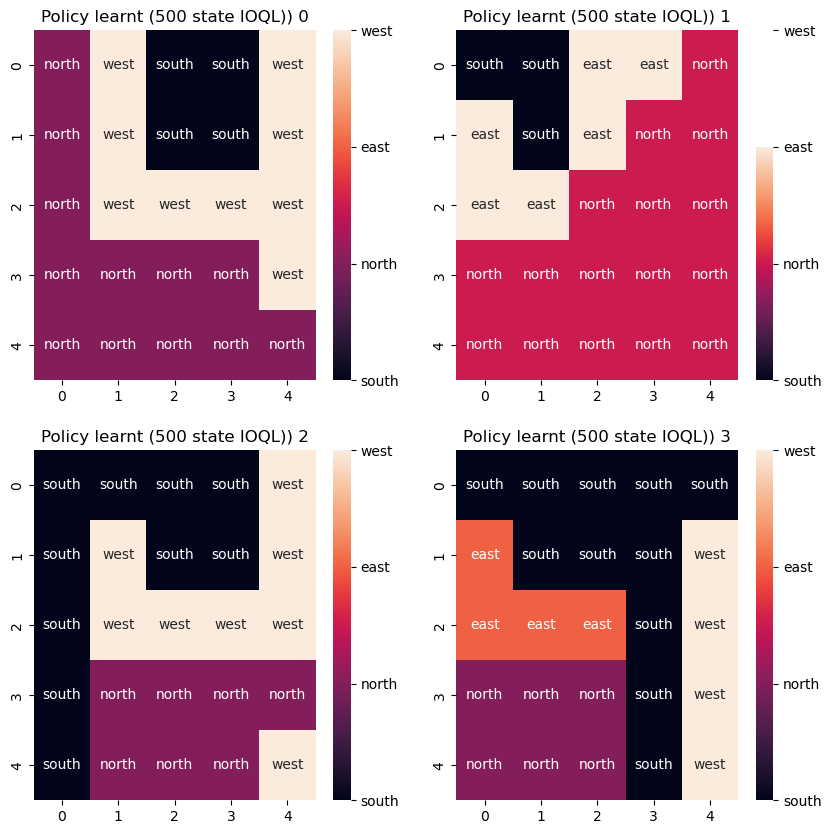

In [27]:
figure, axis = plt.subplots(2,2,figsize=(10,10))
for i in range(2):
  for j in range(2):
    labels = {0:'south',1:'north', 2:'east', 3:'west'}
    annot_text = np.vectorize(labels.get)(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5))
    ax = sns.heatmap(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5),ax=axis[i,j],annot = annot_text,fmt='')
    axis[i,j].set_title("Policy learnt (500 state IOQL)) {}".format(i*2+j))
    c_bar = ax.collections[0].colorbar
    c_bar.set_ticks([i for i in range(4)])
    c_bar.set_ticklabels(['south','north','east','west'])  

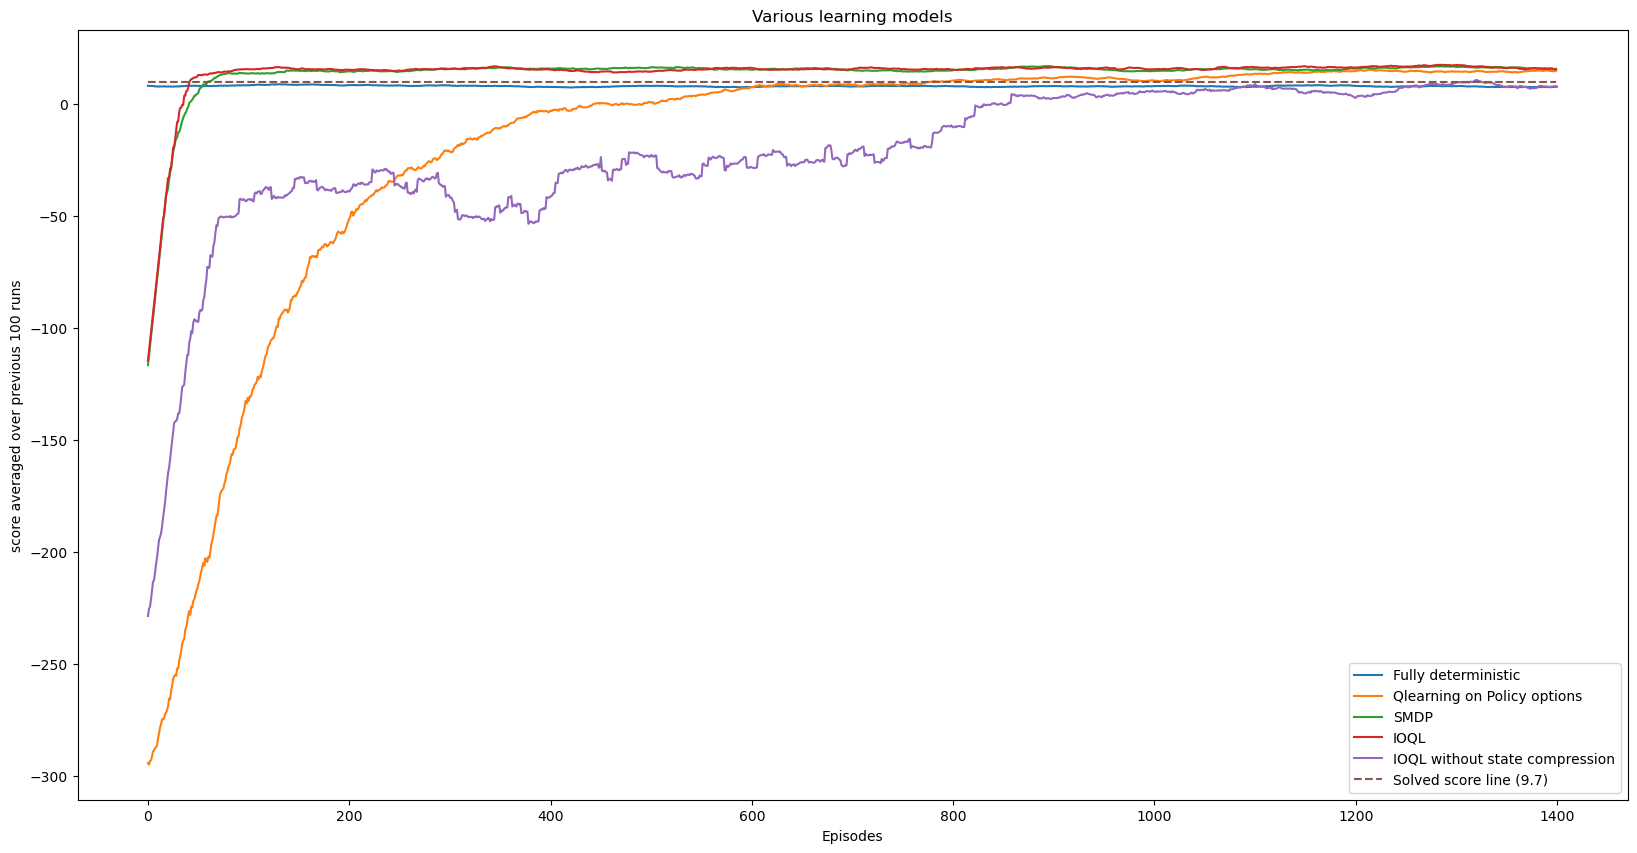

In [28]:
avg_rews4 = [np.average(rewards4[i:i+100]) for i in range(len(rewards4)-100)]

plt.figure(figsize = (20,10))
plt.plot(avg_rews0,label = 'Fully deterministic')
plt.plot(avg_rews1,label = 'Qlearning on Policy options')
plt.plot(avg_rews2,label = 'SMDP')
plt.plot(avg_rews3,label = 'IOQL')
plt.plot(avg_rews4,label = 'IOQL without state compression')
plt.plot([9.7 for i in range(len(avg_rews2))],'--',label = 'Solved score line (9.7)')
plt.xlabel('Episodes')
plt.ylabel('score averaged over previous 100 runs')
plt.title('Various learning models')
plt.legend()